In [140]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [141]:
#Reading data
df = pd.read_csv("dengue_features_train.csv", parse_dates=[3])
df_label = pd.read_csv("dengue_labels_train.csv" , parse_dates=[3])

In [177]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features
   # features = ['reanalysis_specific_humidity_g_per_kg', 
   #              'reanalysis_dew_point_temp_k', 
    #             'station_avg_temp_c', 
    #             'station_min_temp_c',
    #             'reanalysis_min_air_temp_k',
   #              'reanalysis_max_air_temp_k']
   # df = df[features]
    df = df.drop(columns=['week_start_date'])
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    return sj, iq

sj_train, iq_train = preprocess_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv")

X = sj_train.drop(columns=["total_cases"])
y = sj_train["total_cases"]
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X, y, random_state = 5) #5

33 0.5941529777073356


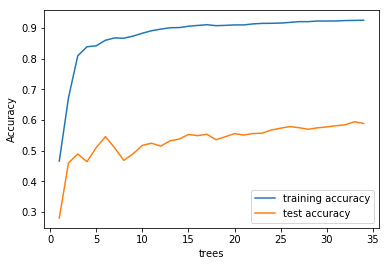

In [178]:


#prediction = forest.predict(X_test_iq)

#print("Accuracy on training set: {:.3f}".format(forest.score(X_train_iq, y_train_iq)))
#print("Accuracy on test set: {:.3f}".format(forest.score(X_test_iq, y_test_iq)))

#print(prediction)

#testing best number of trees
training_accuracy = []
test_accuracy = []
# try number of trees from 1 to 15
tree_range = range(1, 35)
best_number = 0
best_score = 0

#train model for range of trees to get data for graph
for trees in tree_range:
    forest = RandomForestRegressor(n_estimators= trees, random_state=1)
    forest.fit(X_train_iq, y_train_iq)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train_iq, y_train_iq))
    # record generalization accuracy
    temp = forest.score(X_test_iq, y_test_iq)
    if temp > best_score:
        best_number = trees
        best_score = temp 
    test_accuracy.append(temp)

#plot graph
plt.plot(tree_range, training_accuracy, label="training accuracy")
plt.plot(tree_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("trees")
plt.legend()
print(str(best_number) +" " + str (best_score))

34 0.05722255952071753


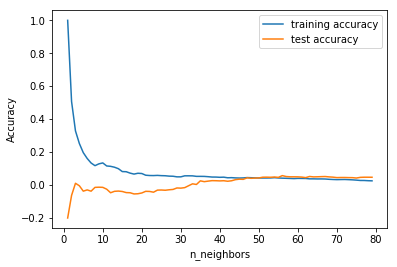

In [179]:
#testing best number of neigbours
training_accuracy = []
test_accuracy = []
# try n_neighbours from 1 to 35
neighbors_settings = range(1, 80)
best_number = 0
best_score = 0

#train model for all range of neigbors to get data for graph
for n_neighbors in neighbors_settings:
    knr = KNeighborsRegressor(n_neighbors = n_neighbors)
    knr.fit(X_train_iq, y_train_iq)
    # record training set accuracy
    training_accuracy.append(knr.score(X_train_iq, y_train_iq))
    # record generalization accuracy
    temp= knr.score(X_test_iq, y_test_iq)
    if temp > best_score:
        best_number = n_neighbours
        best_score = temp 
    test_accuracy.append(temp)

#plot graph
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(str(best_number) +" " + str (best_score))

In [145]:
df_test = pd.read_csv("dengue_features_train.csv", index_col=[0, 1, 2])



In [146]:
    
forest = RandomForestRegressor(n_estimators= 16, random_state=1)
forest.fit(X_train_iq, y_train_iq)


 # fill missing values
df_test.fillna(method='ffill', inplace=True)

prediction = forest.predict(df_test)

#print("Accuracy on training set: {:.3f}".format(forest.score(X_train_iq, y_train_iq)))
#print("Accuracy on test set: {:.3f}".format(forest.score(X_test_iq, y_test_iq)))

print(prediction)

ValueError: could not convert string to float: '2010-06-25'

In [ ]:
#split dataframe in 2 frames for each city and 
#swap null values with the mean value of the column
prepared_df = df.drop(columns=[ 'weekofyear'])
#prepared_df =prepared_df.fillna(prepared_df.mean()) 

iq = prepared_df.loc[prepared_df.city=='iq']
sj = prepared_df.loc[prepared_df.city=='sj']

iq_labels= df_label.loc[df_label.city=='iq']
sj_labels= df_label.loc[df_label.city=='sj']

iq = iq.drop(columns=[ 'city'])
sj = sj.drop(columns=[ 'city'])

iq.set_index('week_start_date', drop = True, inplace = True)
sj.set_index('week_start_date', drop = True, inplace = True)


sj.fillna(method = 'ffill', inplace = True)
iq.fillna(method = 'ffill', inplace = True)

#Create Test and Train sets for both cities data
#and normalize data as long as it's togehther so theres no mistake
#iq
X = iq
y = iq_labels["total_cases"]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X, y, random_state = 0)

#sj
X = sj
y = sj_labels["total_cases"]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X, y, random_state = 0)

In [ ]:
#testing best number of neigbours
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

#train model for all range of neigbours to get data for graph
for n_neighbors in neighbors_settings:
    knr = KNeighborsRegressor(n_neighbors = n_neighbors)
    knr.fit(X_train_iq, y_train_iq)
    # record training set accuracy
    training_accuracy.append(knr.score(X_train_iq, y_train_iq))
    # record generalization accuracy
    test_accuracy.append(knr.score(X_test_iq, y_test_iq))

#plot graph
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
X_train_iq